In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
import os

# Import API key *************NEED TO DO*************
#from api_keys import gkey

In [2]:
csv_path_happiness = "Resources/2017_happiness.csv"
csv_path_libraries = "Resources/lmw_data_09_Feb_2021.csv"
csv_path_population = "Resources/API_SP.POP.TOTL_DS2_en_csv_v2_2017895.csv"
csv_path_capitals = "Resources/concap.csv"

happiness_df = pd.read_csv(csv_path_happiness)
libraries_df = pd.read_csv(csv_path_libraries, encoding='latin-1')
population_df= pd.read_csv(csv_path_population)
capitals_df = pd.read_csv(csv_path_capitals)

In [3]:
happiness_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
libraries_df = libraries_df.loc[(libraries_df["Data Year"] == "2017"), :]
libraries_df = libraries_df.dropna()

#libraries_df.drop(libraries_df[libraries_df["Metric Data"]=="NaN"].index, inplace=True)

#library_df = libraries_df.drop(libraries_df[libraries_df["Metric Data"] == "NaN"].index, inplace=False)

#test_df = libraries_df.loc[libraries_df["Metric Data"]=="NaN", :]
libraries_df

#test_df

,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year
33,Academic,Europe,Belgium,56,Libraries,140,2017
34,Academic,Europe,Belgium,56,Internet_Access,140,2017
35,Academic,Europe,Belgium,56,Staff,502,2017
37,Academic,Europe,Belgium,56,Users,239338,2017
38,Academic,Europe,Belgium,56,Visits,5441703,2017
...,...,...,...,...,...,...,...
8614,Other,Oceania,Australia,36,Internet_Access,2350,2017
8624,Other,Oceania,Kiribati,296,Libraries,10,2017
8625,Other,Oceania,Kiribati,296,Internet_Access,1,2017
8626,Other,Oceania,Kiribati,296,Staff,7,2017


In [5]:
libraries_df["Metric Data"] = pd.to_numeric(libraries_df["Metric Data"],errors="coerce")

In [6]:
population_df = population_df[["Country Name", "2017"]]
population_df = population_df.rename(columns={"2017":"Population Amount"})
population_df.head()

,Country Name,Population Amount
0,Aruba,105366.0
1,Afghanistan,36296400.0
2,Angola,29816748.0
3,Albania,2873457.0
4,Andorra,77001.0


In [7]:
combined_df = pd.merge(happiness_df, libraries_df, how='left', left_on=["Country"], right_on=["Country or Area"])
combined_df = pd.merge(combined_df, population_df, how='left', left_on=["Country"], right_on=["Country Name"])
combined_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Dystopia.Residual,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year,Country Name,Population Amount
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,2.277027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norway,5276968.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,2.313707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denmark,5764980.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,2.322715,National,Europe,Iceland,352.0,Staff,70.0,2017,Iceland,343400.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,2.276716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,8451840.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,Academic,Europe,Finland,246.0,Libraries,152.0,2017,Finland,5508214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,...,1.683024,Public,Africa,Burundi,108.0,Internet_Access,1.0,2017,Burundi,10827024.0
749,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,...,1.683024,Public,Africa,Burundi,108.0,Staff,2.0,2017,Burundi,10827024.0
750,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,...,1.683024,Public,Africa,Burundi,108.0,Volunteers,0.0,2017,Burundi,10827024.0
751,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,...,1.683024,Public,Africa,Burundi,108.0,Visits,5400.0,2017,Burundi,10827024.0


In [8]:
combined_df = combined_df.dropna()
combined_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Dystopia.Residual,Library Type,Region,Country or Area,M49 Code,Metric,Metric Data,Data Year,Country Name,Population Amount
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,2.322715,National,Europe,Iceland,352.0,Staff,70.0,2017,Iceland,343400.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,Academic,Europe,Finland,246.0,Libraries,152.0,2017,Finland,5508214.0
5,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,Academic,Europe,Finland,246.0,Internet_Access,152.0,2017,Finland,5508214.0
6,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,Academic,Europe,Finland,246.0,Staff,1307.0,2017,Finland,5508214.0
7,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,2.430182,Academic,Europe,Finland,246.0,Users,1073494.0,2017,Finland,5508214.0


In [9]:
# library_visits_df = libraries_df.loc[libraries_df["Metric"]=="Visits", :]

# #library_visits_df.dropna()
# #library_visits_df["Metric Data (INT)"] = library_visits_df["Metric Data"].astype(int)


# #library_visits_df.head(100)
# type_group_df = library_visits_df.groupby(["Library Type"]).sum()

# type_group_df

In [10]:
# PAM CODE HERE - start

In [11]:
libraries_2017_df = libraries_df.loc[(libraries_df["Data Year"] == "2017"), ["Library Type", "Region","Country or Area", "Metric", "Metric Data"]]
                                
libraries_2017_df = libraries_2017_df.dropna()
                                         
libraries_2017_df.head()

,Library Type,Region,Country or Area,Metric,Metric Data
33,Academic,Europe,Belgium,Libraries,140
34,Academic,Europe,Belgium,Internet_Access,140
35,Academic,Europe,Belgium,Staff,502
37,Academic,Europe,Belgium,Users,239338
38,Academic,Europe,Belgium,Visits,5441703


In [12]:
lib_pop_2017_df = pd.merge(libraries_2017_df, population_df, how='left', left_on=["Country or Area"], right_on=["Country Name"])
#lib_pop_2017_df["Metric Per Pop"] = lib_pop_2017_df["Metric Data"]/lib_pop_2017_df["Population Amount"]

lib_pop_2017_df

,Library Type,Region,Country or Area,Metric,Metric Data,Country Name,Population Amount
0,Academic,Europe,Belgium,Libraries,140,Belgium,11375158.0
1,Academic,Europe,Belgium,Internet_Access,140,Belgium,11375158.0
2,Academic,Europe,Belgium,Staff,502,Belgium,11375158.0
3,Academic,Europe,Belgium,Users,239338,Belgium,11375158.0
4,Academic,Europe,Belgium,Visits,5441703,Belgium,11375158.0
...,...,...,...,...,...,...,...
865,Other,Oceania,Australia,Internet_Access,2350,Australia,24601860.0
866,Other,Oceania,Kiribati,Libraries,10,Kiribati,114158.0
867,Other,Oceania,Kiribati,Internet_Access,1,Kiribati,114158.0
868,Other,Oceania,Kiribati,Staff,7,Kiribati,114158.0


In [13]:
lib_pop_2017_visits_df = lib_pop_2017_df.loc[lib_pop_2017_df["Metric"]=="Visits", :]

lib_pop_2017_visits_df = lib_pop_2017_visits_df.dropna()

lib_pop_2017_visits_df

,Library Type,Region,Country or Area,Metric,Metric Data,Country Name,Population Amount
4,Academic,Europe,Belgium,Visits,5441703,Belgium,11375158.0
10,Academic,Europe,Finland,Visits,9936572,Finland,5508214.0
19,Academic,Europe,Hungary,Visits,5101270,Hungary,9787966.0
27,Academic,Europe,Ireland,Visits,6805072,Ireland,4807388.0
34,Academic,Europe,Poland,Visits,15597530,Poland,37974826.0
...,...,...,...,...,...,...,...
764,School,Asia,Nepal,Visits,973500,Nepal,27627124.0
785,Other,Europe,Hungary,Visits,184588,Hungary,9787966.0
793,Other,Europe,Poland,Visits,2786029,Poland,37974826.0
823,Other,Latin America and the Caribbean,Jamaica,Visits,4600,Jamaica,2920853.0


In [14]:
visits_by_type_df = lib_pop_2017_visits_df.groupby(["Library Type"]).sum()

visits_by_type_df["Visits Per Capita"] = visits_by_type_df["Metric Data"]/visits_by_type_df["Population Amount"]

visits_by_type_df = visits_by_type_df.reset_index()
visits_by_type_df

,Library Type,Metric Data,Population Amount,Visits Per Capita
0,Academic,135683951,156843373.0,0.865092
1,Community,2548522,58453053.0,0.043599
2,National,14563106,216272105.0,0.067337
3,Other,2981192,59396945.0,0.050191
4,Public,246367027,286076359.0,0.861193
5,School,133639852,204603055.0,0.653166


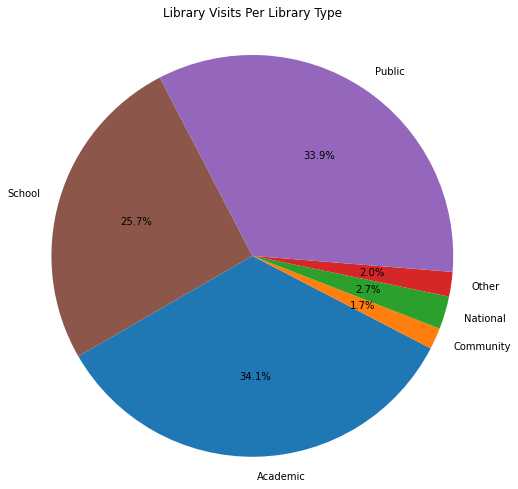

In [15]:
labels = visits_by_type_df["Library Type"]

library_types = visits_by_type_df["Visits Per Capita"]

explode = (0, 0, 0.0, 0.0, 0.0, 0.0)

title = f"Library Visits Per Library Type\n"
plt.title(title)
plt.pie(library_types, labels=labels, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=210)
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(8,8)

# Save figure
plt.savefig('VisitsPerLibraryType.png')

plt.show()

In [16]:
lib_pop_2017_amount_df = lib_pop_2017_df.loc[lib_pop_2017_df["Metric"]=="Libraries", :]

lib_pop_2017_amount_df = lib_pop_2017_amount_df.dropna()

lib_pop_2017_amount_df

,Library Type,Region,Country or Area,Metric,Metric Data,Country Name,Population Amount
0,Academic,Europe,Belgium,Libraries,140,Belgium,1.137516e+07
6,Academic,Europe,Finland,Libraries,152,Finland,5.508214e+06
14,Academic,Europe,Hungary,Libraries,209,Hungary,9.787966e+06
23,Academic,Europe,Ireland,Libraries,31,Ireland,4.807388e+06
30,Academic,Europe,Poland,Libraries,896,Poland,3.797483e+07
...,...,...,...,...,...,...,...
828,Other,Asia,Armenia,Libraries,6,Armenia,2.944809e+06
842,Other,Asia,India,Libraries,319,India,1.338659e+09
846,Other,Asia,Israel,Libraries,11,Israel,8.713300e+06
864,Other,Oceania,Australia,Libraries,2350,Australia,2.460186e+07


In [17]:
amount_by_type_df = lib_pop_2017_amount_df.groupby(["Library Type"]).sum()

amount_by_type_df = amount_by_type_df.reset_index()

amount_by_type_df

,Library Type,Metric Data,Population Amount
0,Academic,48198,1.865761e+09
1,Community,17194,1.464229e+09
2,National,77,1.681136e+09
3,Other,3608,1.497060e+09
4,Public,173437,3.269041e+09
5,School,68603,2.367634e+08


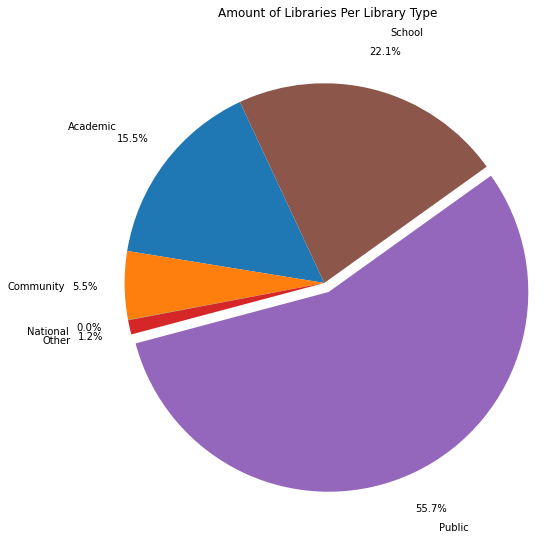

In [18]:
labels = amount_by_type_df["Library Type"]

library_types = amount_by_type_df["Metric Data"]

explode = (0, 0, 0.0, 0.0, 0.05, 0.0)

title = f"Amount of Libraries Per Library Type\n\n\n"
plt.title(title)
plt.pie(library_types, labels=labels, explode=explode, pctdistance=1.2, labeldistance=1.3,
        autopct="%1.1f%%", shadow=False, startangle=115)
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(8,8)

# Save figure
plt.savefig('AmountOfLibrariesPerLibraryType.png')
plt.show()

In [19]:
# PAM CODE HERE - end

In [20]:
# ZOE CODE HERE - start

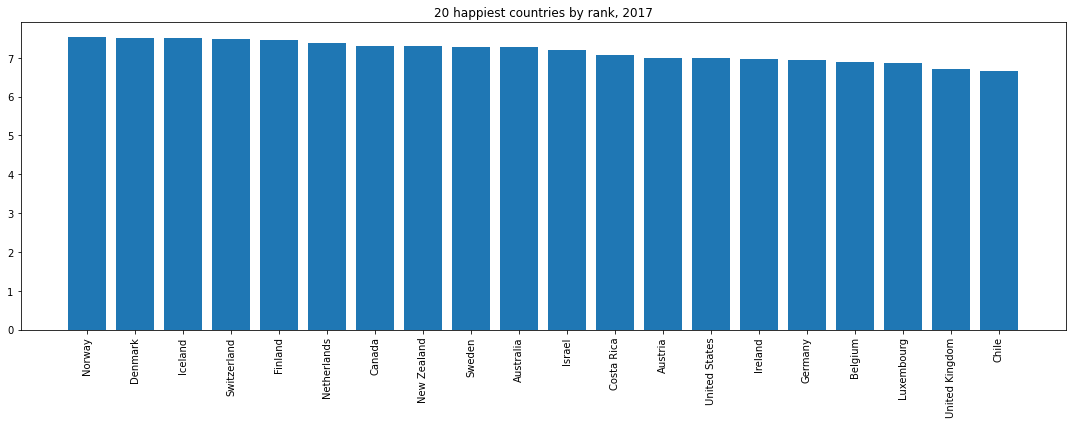

In [21]:
## Overall happiness index 2017
# Get top 20
happiest_countries = happiness_df.loc[happiness_df["Happiness.Rank"] <= 20]

# set x axis and tick locations
countries = happiest_countries["Country"]
happiness = happiest_countries["Happiness.Score"]

# Create chart
plt.figure(figsize=(15,6))
happy_bar = plt.bar(countries, happiness, align="center")
plt.xticks(rotation="vertical")
plt.title("20 happiest countries by rank, 2017")
plt.tight_layout()

# Add happiness score text to bars
# for column in happy_bar:
#     height = column.get_height()
#     plt.text(column.get_x() + column.get_width()/2.0, height, '%d' % float(height), ha='center', va='bottom')

# Save figure
plt.savefig('happiest_countries.png')

# Display
plt.show()

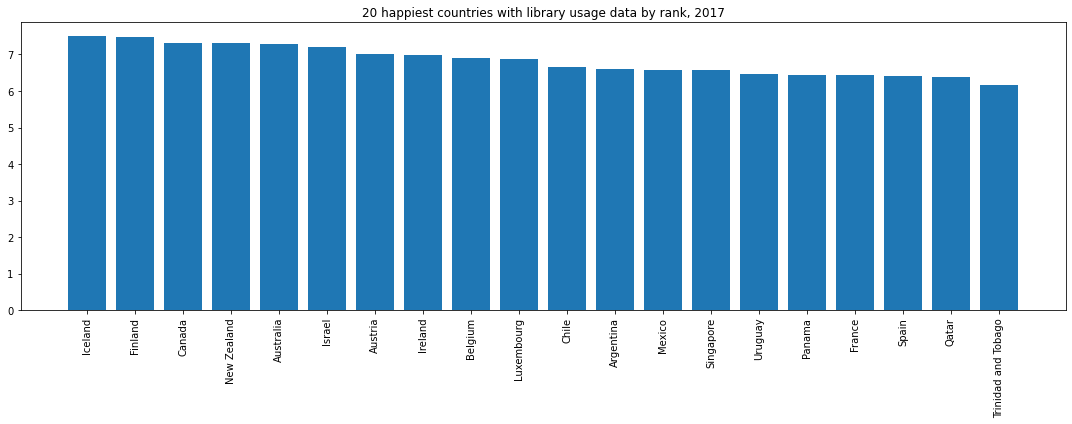

In [22]:
## Happiness index for countries which we also have library data for
# Get top 20
happiest_library_countries = combined_df.loc[combined_df["Happiness.Score"] > 6.1]

# set x axis and tick locations
countries = happiest_library_countries["Country"]
happiness = happiest_library_countries["Happiness.Score"]

# Create chart
plt.figure(figsize=(15,6))
plt.bar(countries, happiness, align="center")
plt.xticks(rotation="vertical")
plt.title("20 happiest countries with library usage data by rank, 2017")
plt.tight_layout()

# Save figure
plt.savefig('happiest_library_countries.png')

# Display
plt.show()

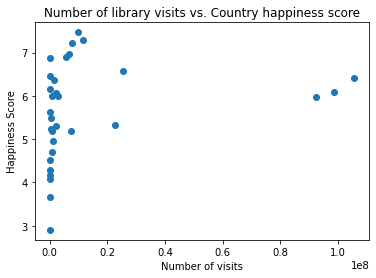

In [23]:
## Scatter plot of physical visits and happiness
# Drop metric rows for non-visit data
visits_df = combined_df.drop(combined_df[combined_df["Metric"] != "Visits"].index, inplace=False)

# Sum visits for all library types for each country
total_visits = visits_df.groupby("Country")
total_visits_sum = total_visits["Metric Data"].sum()

# Pull happiness scores for each country
happiness_score = total_visits["Happiness.Score"].mean()

# Plot
plt.scatter(total_visits_sum, happiness_score)
plt.xlabel("Number of visits")
plt.ylabel("Happiness Score")
plt.title("Number of library visits vs. Country happiness score")

# Save figure
plt.savefig('physicalvisits_v_happiness.png')

# Display
plt.show()

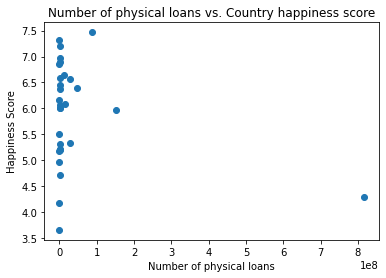

In [24]:
## Scatter plot of loans and happiness
# Drop metric rows for non-physical loan data
loans_df = combined_df.drop(combined_df[combined_df["Metric"] != "Loans_books"].index, inplace=False)

# Sum loans for all library types for each country
total_loans = loans_df.groupby("Country")
total_loans_sum = total_loans["Metric Data"].sum()

# Pull happiness scores for each country
happiness_score = total_loans["Happiness.Score"].mean()

# Plot
plt.scatter(total_loans_sum, happiness_score)
plt.xlabel("Number of physical loans")
plt.ylabel("Happiness Score")
plt.title("Number of physical loans vs. Country happiness score")

# Save figure
plt.savefig('physicalloans_v_happiness.png')

# Display
plt.show()

In [25]:
# ZOE CODE HERE - end

In [26]:
# MALLORY CODE HERE - start

In [27]:
number_libraries_df = combined_df.loc[combined_df["Metric"] == "Libraries", :]

In [43]:
number_group = number_libraries_df.groupby(["Country"])
num_lib_df = number_group.sum()
num_pop_df = number_group.max()
num_lib_df = pd.DataFrame(num_lib_df["Metric Data"])
num_pop_df = pd.DataFrame(num_pop_df["Population Amount"])

pop_lib_df = pd.merge(num_lib_df, num_pop_df, how='left', on=["Country"])
pop_lib_df["Libraries Per Capita"] = pop_lib_df["Metric Data"]/pop_lib_df["Population Amount"]
pop_lib_df

,Metric Data,Population Amount,Libraries Per Capita
Country,,,
Argentina,2425.0,4.404481e+07,5.505756e-05
Armenia,232.0,2.944809e+06,7.878270e-05
Australia,11803.0,2.460186e+07,4.797605e-04
Austria,8.0,8.797566e+06,9.093424e-07
Belgium,141.0,1.137516e+07,1.239543e-05
Benin,233.0,1.117520e+07,2.084973e-05
Bhutan,1.0,7.455680e+05,1.341259e-06
Bulgaria,1.0,7.075947e+06,1.413238e-07
Burundi,1.0,1.082702e+07,9.236148e-08


In [44]:
x_axis = np.arange(len(pop_lib_df))
tick_locations = [value+0.4 for value in x_axis]

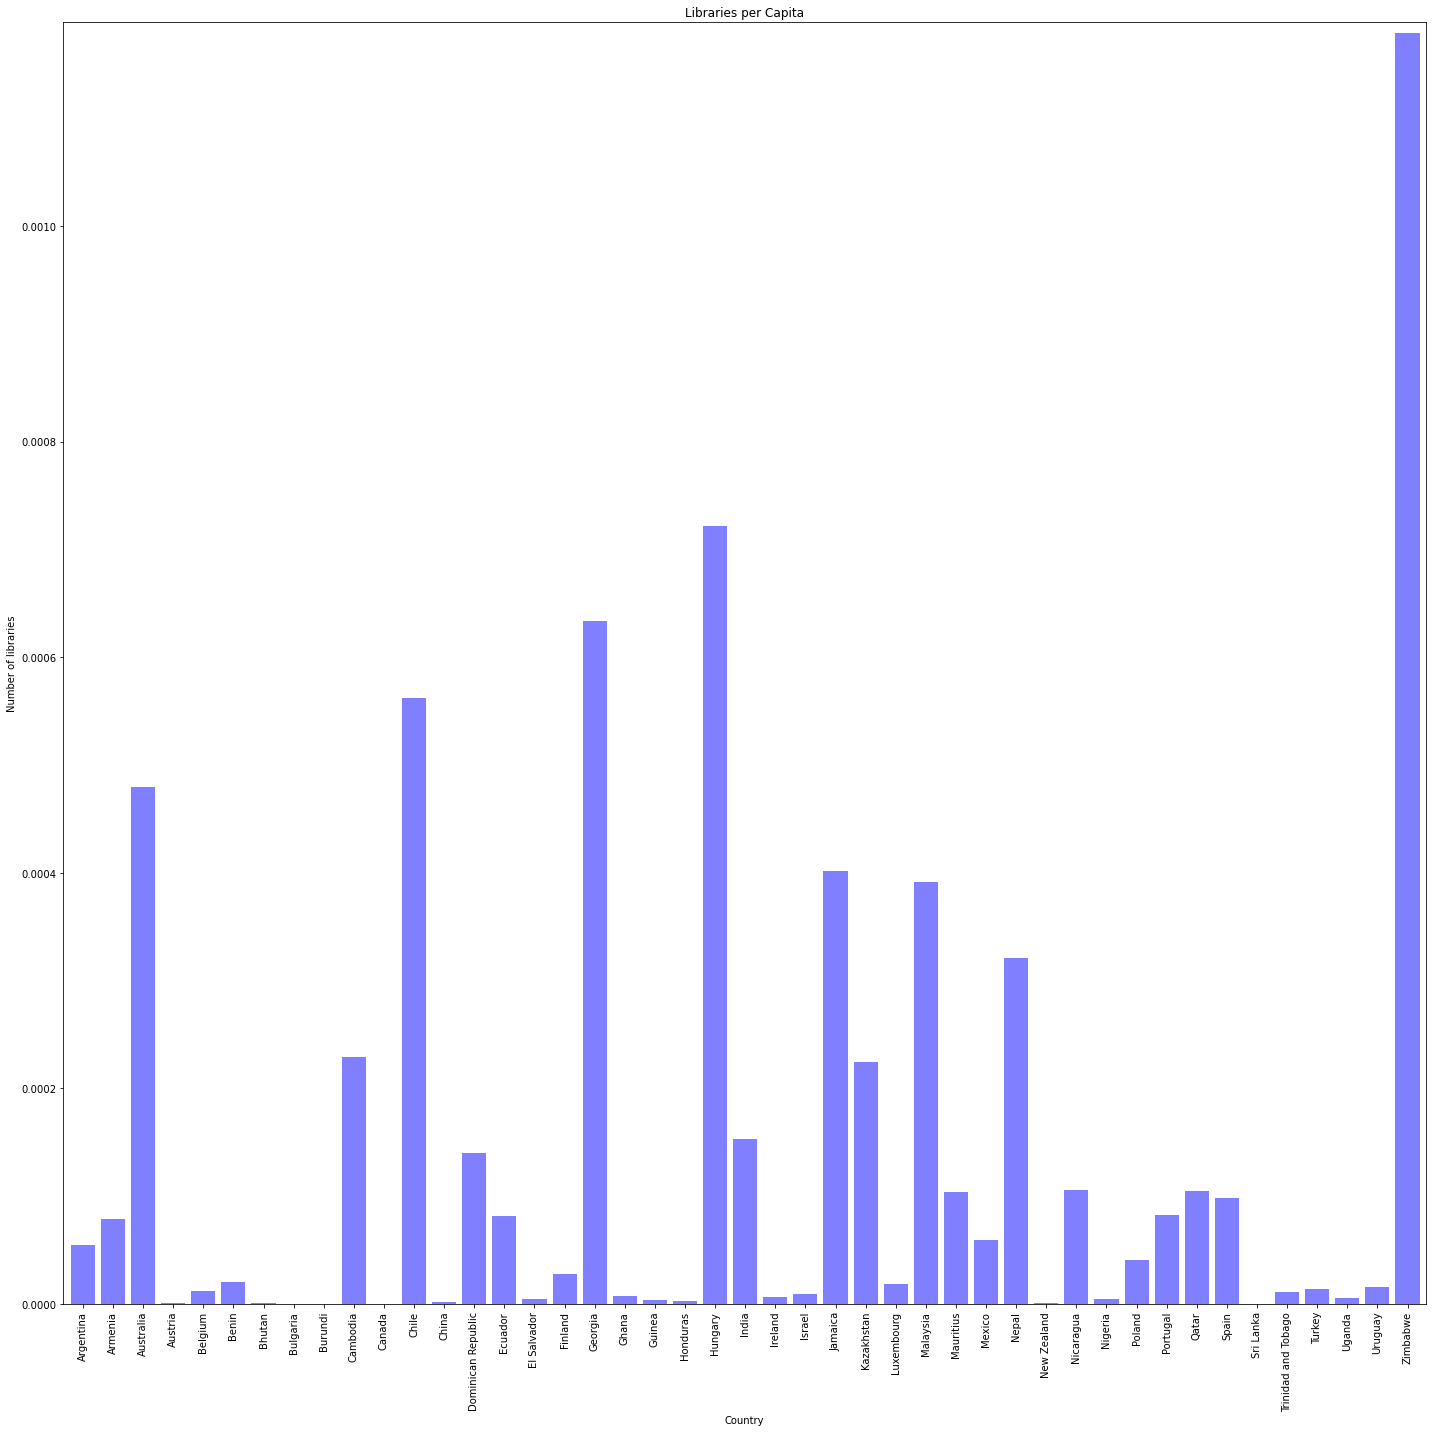

In [60]:
plt.figure(figsize = (20,20))
plt.bar(x_axis,pop_lib_df["Libraries Per Capita"],color='b',alpha=0.5, align='edge')
plt.xticks(tick_locations, num_lib_df.index,rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(pop_lib_df["Libraries Per Capita"])+.00001)

plt.title("Libraries per Capita")
plt.xlabel("Country")
plt.ylabel("Number of libraries")

#plt.savefig("Images/libraries_per_country_bar")

plt.tight_layout()
plt.show()

In [31]:
# MALLORY CODE HERE - end

In [32]:
#ELLIE CODE HERE - start

In [33]:
libraries_df["Metric Data"] = pd.to_numeric(libraries_df["Metric Data"],errors="coerce")

In [34]:
#create DF to show only country and number of visits?
visits_df = libraries_df.loc[libraries_df["Metric"]=="Visits", :]
visits_df.dtypes

Library Type       object
Region             object
Country or Area    object
M49 Code            int64
Metric             object
Metric Data         int64
Data Year          object
dtype: object

In [35]:
grouped_visits_df = visits_df.groupby(['Country or Area'])
print(grouped_visits_df)
grouped_visits_df=grouped_visits_df.sum().head(20)


In [36]:
visit_number=grouped_visits_df.groupby(['Country or Area'])
new_visits_df=visit_number.sum()
new_visits_df = pd.DataFrame(grouped_visits_df["Metric Data"])
new_visits_df


,Metric Data
Country or Area,
Australia,11580130
Bahamas,35232
Belgium,5541409
Benin,11953
Bulgaria,594934
Burundi,5400
Cambodia,13000
"China, Hong Kong Special Administrative Region",50683616
"China, Macao Special Administrative Region",5374474


In [37]:
x_axis = np.arange(len(new_visits_df))
tick_locations = [value+0.5 for value in x_axis]

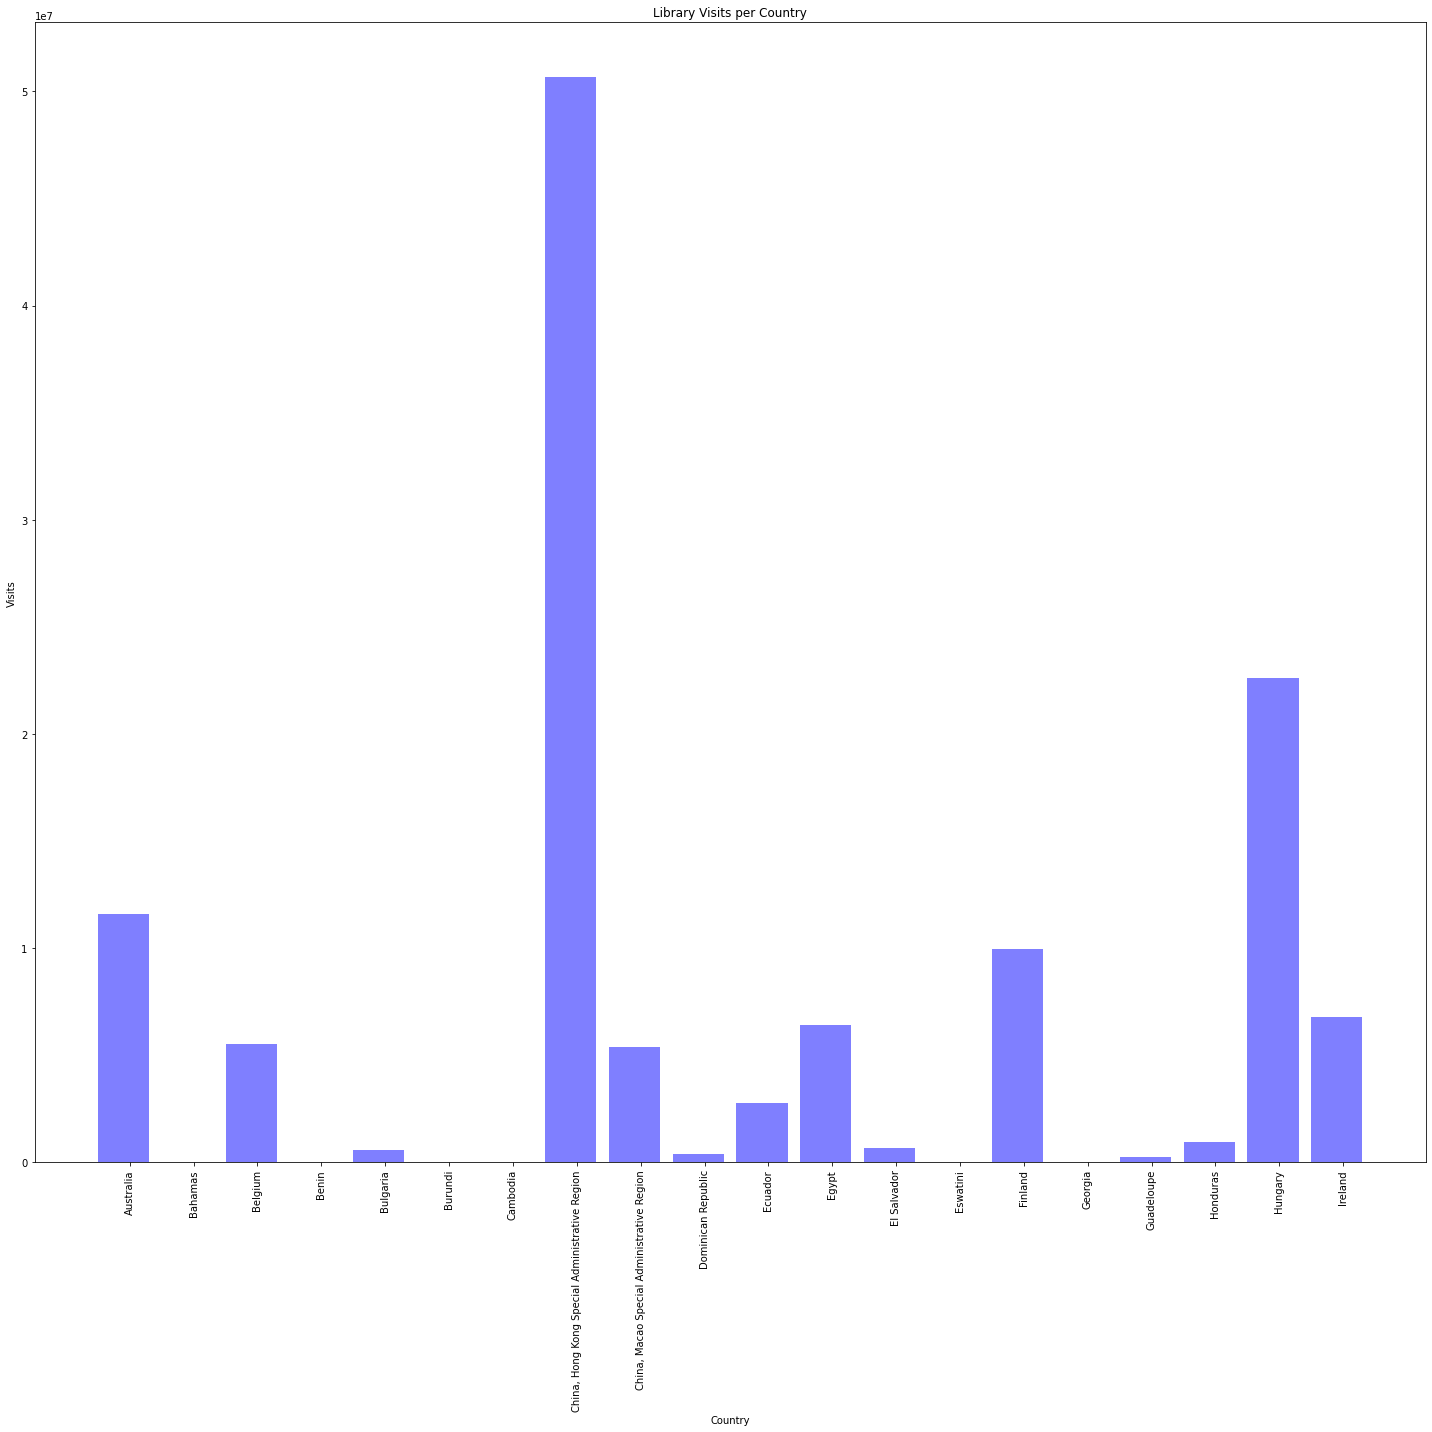

In [38]:
# Library Visits per Country - Bar Graph 
plt.figure(figsize = (20,20))

plt.bar(x_axis,new_visits_df["Metric Data"],color='b',alpha=0.5, align='edge')
plt.xticks(tick_locations, new_visits_df.index,rotation="vertical")

plt.xlabel ("Country")
plt.ylabel ("Visits")
plt.title ("Library Visits per Country") 


#plt.xlim([])
#plt.ylim([])

plt.tight_layout()
plt.show()

In [39]:
# ELLIE CODE HERE - end

In [ ]:
# Heatmap